In [1]:
#  Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [2]:
# Load the Iris dataset from sklearn
try:
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})
except Exception as e:
    print(f"Error loading dataset: {e}")


In [3]:
print("First five rows:")
print(df.head())


First five rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Check data types and missing values
print("\nData info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
# Basic data analysis
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Group by species and compute means
grouped = df.groupby('species').mean()
print("\nAverage measurements per species:")
print(grouped)



Average measurements per species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [7]:
# Observations:
# Setosa tends to have shorter petals and sepals.
# Virginica tends to have the largest measurements overall.

<Figure size 1000x600 with 0 Axes>

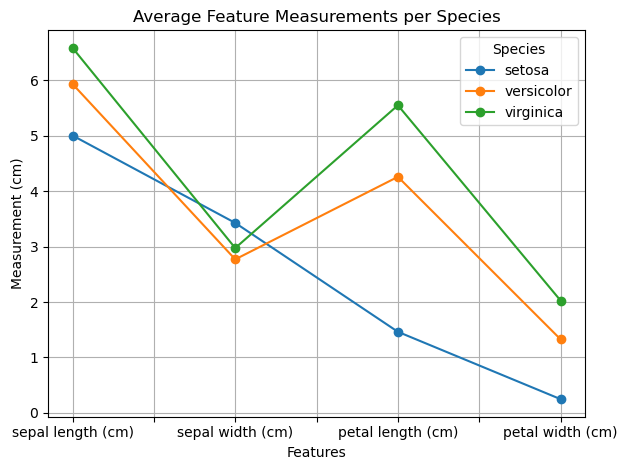

In [8]:
# Data Visualization
# Line Chart: Mean measurements per species
plt.figure(figsize=(10, 6))
grouped.T.plot(marker='o')
plt.title('Average Feature Measurements per Species')
plt.xlabel('Features')
plt.ylabel('Measurement (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_260/1094752002.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='species', y='petal length (cm)', estimator='mean', ci=None)


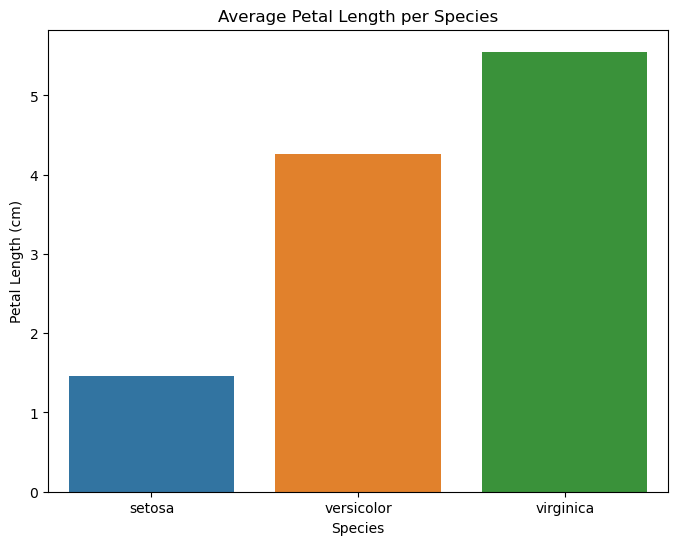

In [9]:
# 2.Bar Chart: Average petal length by species
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='species', y='petal length (cm)', estimator='mean', ci=None)
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()


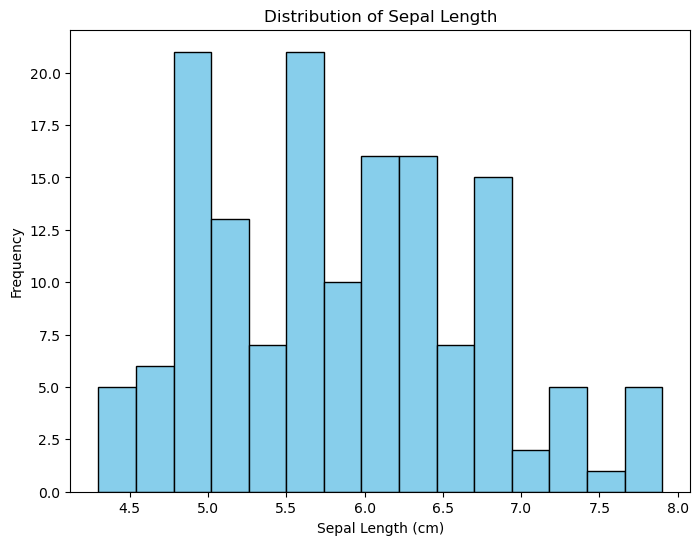

In [10]:
# 3. Histogram: Distribution of sepal length
plt.figure(figsize=(8, 6))
plt.hist(df['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


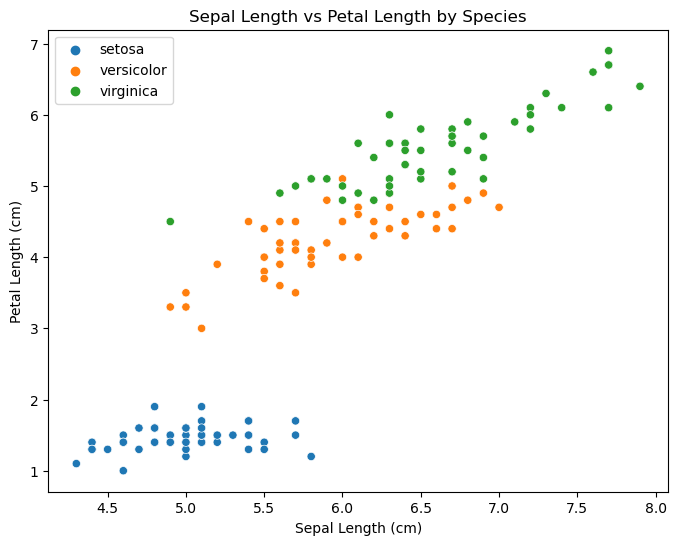

In [11]:
# 4. Scatter Plot: Sepal length vs Petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


In [12]:
#  Final Observations
#  Setosa is well-separated with small petal measurements.
#  Virginica has the largest features on average.
#  Versicolor lies between the other two in terms of size.
#  The scatter plot reveals clear clustering, especially for Setosa.
#  No missing or incorrect values were found.